In [1]:
import pandas as pd

In [2]:
uri = "https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv"
dados = pd.read_csv(uri)
dados

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170
...,...,...,...
2152,0,80,7518
2153,1,52,1332
2154,0,40,473
2155,0,75,5324


In [3]:
mapa = {

    "unfinished" : "finalizado",
    "expected_hours" : "horas_esperadas",
    "price"  : "preco"

}

df_renomeado = dados.rename(columns=mapa)
df_renomeado

,finalizado,horas_esperadas,preco
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170
...,...,...,...
2152,0,80,7518
2153,1,52,1332
2154,0,40,473
2155,0,75,5324


In [4]:
troca = {
    0 : 1,
    1 : 0
}

df_renomeado['finalizado'] = df_renomeado.finalizado.map(troca)


In [5]:
df_renomeado


,finalizado,horas_esperadas,preco
0,0,26,192
1,0,88,9015
2,0,89,2577
3,0,42,275
4,0,39,170
...,...,...,...
2152,1,80,7518
2153,0,52,1332
2154,1,40,473
2155,1,75,5324


In [6]:
x = df_renomeado[["horas_esperadas","preco"]]
y = df_renomeado["finalizado"]


In [7]:
x

,horas_esperadas,preco
0,26,192
1,88,9015
2,89,2577
3,42,275
4,39,170
...,...,...
2152,80,7518
2153,52,1332
2154,40,473
2155,75,5324


<Axes: xlabel='horas_esperadas', ylabel='preco'>

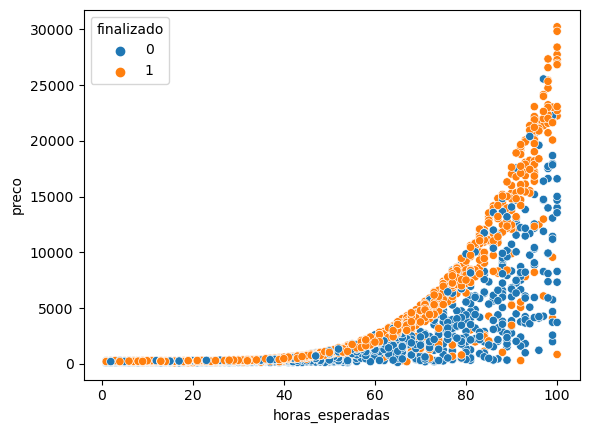

In [8]:
import seaborn as sns


sns.scatterplot(x="horas_esperadas",y="preco",data=df_renomeado, hue="finalizado")

C:\Users\adm\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


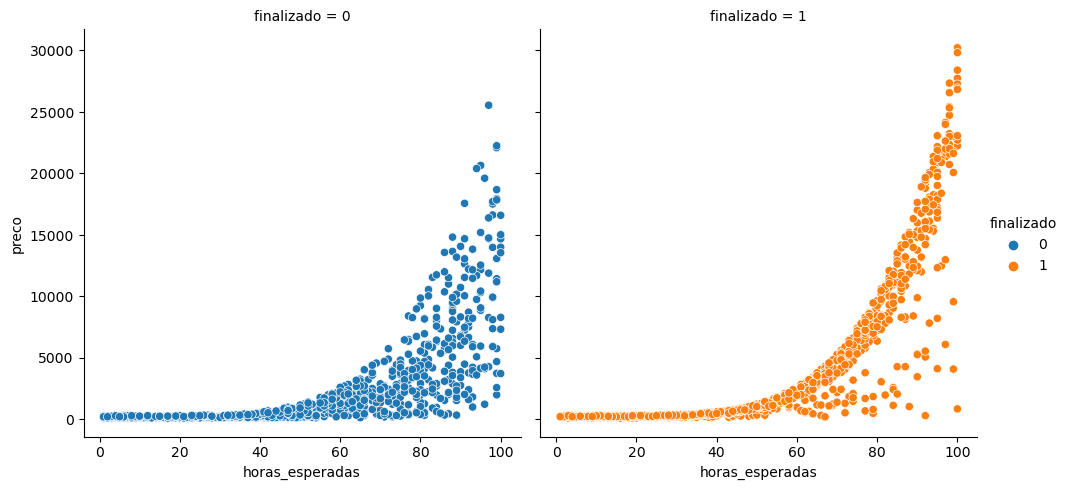

In [9]:
sns.relplot(x="horas_esperadas",y="preco",data=df_renomeado, col="finalizado", hue="finalizado")

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

SEED = 20

treino_x, teste_x, treino_y, teste_y = train_test_split(x,y,test_size=0.25, random_state=SEED, stratify=y)

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes)*100

print("A acurácia desse modelo foi de: %.2f%%" % acuracia)


A acurácia desse modelo foi de: 47.41%


C:\Users\adm\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adm\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [11]:
x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()
y_min = teste_x.preco.min()
y_max = teste_x.preco.max()
print(x_min, x_max,y_min,y_max)

1 100 101 27738


In [12]:
import numpy as np

pixels = 100
np.arange(x_min, x_max, (x_max - x_min)/pixels)

array([ 1.  ,  1.99,  2.98,  3.97,  4.96,  5.95,  6.94,  7.93,  8.92,
        9.91, 10.9 , 11.89, 12.88, 13.87, 14.86, 15.85, 16.84, 17.83,
       18.82, 19.81, 20.8 , 21.79, 22.78, 23.77, 24.76, 25.75, 26.74,
       27.73, 28.72, 29.71, 30.7 , 31.69, 32.68, 33.67, 34.66, 35.65,
       36.64, 37.63, 38.62, 39.61, 40.6 , 41.59, 42.58, 43.57, 44.56,
       45.55, 46.54, 47.53, 48.52, 49.51, 50.5 , 51.49, 52.48, 53.47,
       54.46, 55.45, 56.44, 57.43, 58.42, 59.41, 60.4 , 61.39, 62.38,
       63.37, 64.36, 65.35, 66.34, 67.33, 68.32, 69.31, 70.3 , 71.29,
       72.28, 73.27, 74.26, 75.25, 76.24, 77.23, 78.22, 79.21, 80.2 ,
       81.19, 82.18, 83.17, 84.16, 85.15, 86.14, 87.13, 88.12, 89.11,
       90.1 , 91.09, 92.08, 93.07, 94.06, 95.05, 96.04, 97.03, 98.02,
       99.01])

In [13]:
pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min)/ pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min)/ pixels)

In [14]:
xx, yy = np.meshgrid(eixo_x, eixo_y)
xx

array([[ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
       [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
       [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
       ...,
       [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
       [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
       [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01]])

In [15]:
xx, yy = np.meshgrid(eixo_x, eixo_y)
xx.ravel()

array([ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01])

In [16]:
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]
pontos

array([[1.000000e+00, 1.010000e+02],
       [1.990000e+00, 1.010000e+02],
       [2.980000e+00, 1.010000e+02],
       ...,
       [9.703000e+01, 2.746163e+04],
       [9.802000e+01, 2.746163e+04],
       [9.901000e+01, 2.746163e+04]])

In [17]:
Z = modelo.predict(pontos)

C:\Users\adm\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


In [18]:
Z = modelo.predict(pontos)
Z.shape

C:\Users\adm\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


(10000,)

In [19]:
xx.shape

(100, 100)

In [20]:
Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)
Z

C:\Users\adm\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=int64)

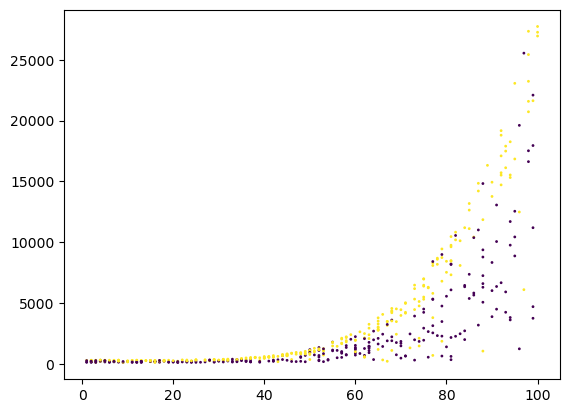

In [21]:
import matplotlib.pyplot as plt

plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s=1)

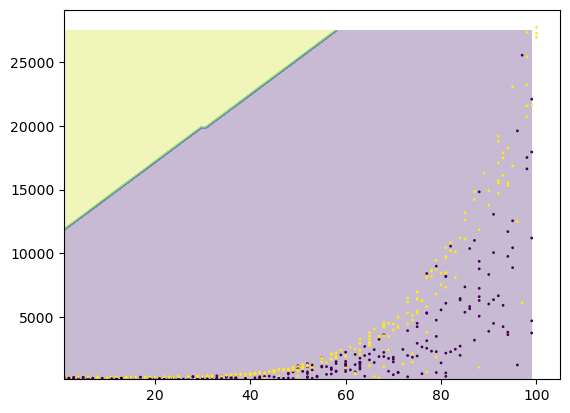

In [22]:
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s=1)

In [23]:
from sklearn.svm import SVC


In [24]:
model = SVC(gamma='auto')

In [25]:
model.fit(treino_x,treino_y)

SVC(gamma='auto')

In [26]:
previsoes = model.predict(teste_x)
acuracia = accuracy_score(teste_y, previsoes)
print(acuracia)

0.5888888888888889


In [27]:
np.random.seed(SEED)


C:\Users\adm\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


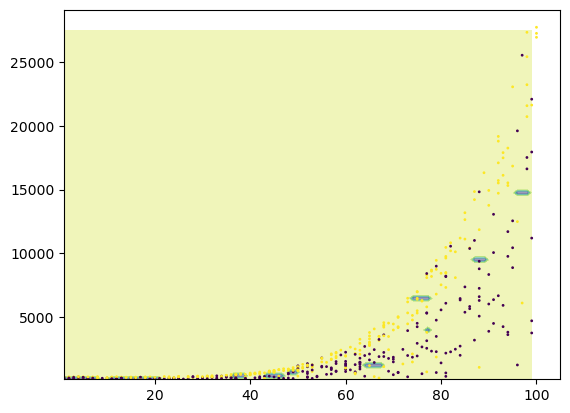

In [29]:
x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()
y_min = teste_x.preco.min()
y_max = teste_x.preco.max()

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

Z = model.predict(pontos)
Z = Z.reshape(xx.shape)

import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s=1)

# DECISION BOUNDARY

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 18
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 67.41%


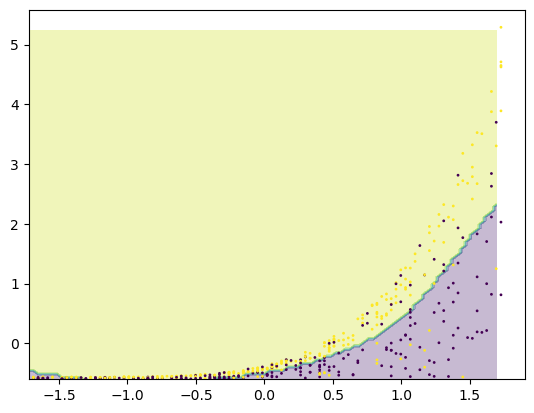

In [41]:
data_x = teste_x[:,0]
data_y = teste_x[:,1]

x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)

import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(data_x, data_y, c=teste_y, s=1)